# Homework 8

## Problem 1: Approximating matrix products 

In this problem, we will show how we can approximate a matrix product of the form $AB$, where $A$ is a $n\times m$ matrix and $B$ is a $m\times p$ matrix. The key to our approximation will be the following fact: let $\mathbf{a}_1, \dots, \mathbf{a}_m$ be the columns of $A$ and let $\mathbf{b}_1,\dots, \mathbf{b}_m$ be the rows of $B$. Then 

$$
AB = \sum_{j=1}^m \mathbf{a}_j\mathbf{b}_j^\top
$$

Note that here $\mathbf{a}_j$ is of dimension $n\times 1$, and $\mathbf{b}_j^\top$ is of dimension $1\times p$. Therefore, $\mathbf{a}_j\mathbf{b}_j^\top$ is a $n\times p$ matrix for all $j = 1,\dots,m$, and so the above sum is in fact well-defined. In this problem, we will use this representation to approximate the matrix product $AB$ by keeping only the first $k$ terms in the above sum.

### Part A
Create random matrices $A \in \mathbb{R}^{n\times m}$ and $B \in \mathbb{R}^{m\times p}$, where $n = 1000, m =100, p=1000$.

In [76]:
import numpy as np

n = 1000
m = 100
p = 1000

A = np.random.rand(n, m)
B = np.random.randn(m, p)

### Part B
Write a function `approximate_product(A,B,k)` which takes in matrices $A,B$ and returns the matrix $\sum_{j=1}^k \mathbf{a}_j\mathbf{b}_j^\top$. (Hint: you can use the function `np.outer()` to compute the products $\mathbf{a}_j\mathbf{b}_j^\top$.)

In [77]:
def approximate_product(A,B,k):
    n = A.shape[0]
    m = A.shape[1]
    p = B.shape[1]
    
    approx = np.zeros((n, p))
    
    for j in range(k):
        approx += np.outer(A[:,j], B[j,:])
    return approx

### Part C
For each $k=1,\dots, m$, use your function `approximate_product()` to compute the matrix $\hat{C}_k = \sum_{j=1}^k \mathbf{a}_j\mathbf{b}_j^\top$, and compute the _Frobenius_ norm difference between $\hat{C}_k$ and $AB$, denoted $\delta_k = \|\hat{C}_k - AB\|_F$. (Note that in numpy, for matrices $X$ and $Y$, you can compute $\|X-Y\|_F$ using `np.linalg.norm(X-Y, ord='fro')`). Then, plot $\delta_k$ as a function of $k$. What happens to $\delta_k$ as $k$ gets larger?

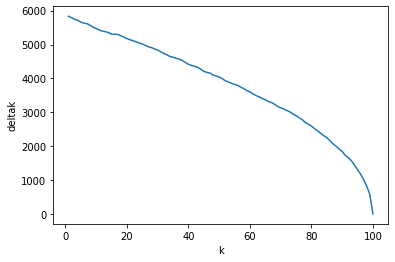

In [78]:
import matplotlib.pyplot as plt

AB = np.dot(A,B)
deltas = []
for k in np.arange(1,m+1):
    Ck = approximate_product(A, B, k)
    deltak = np.linalg.norm(Ck- AB, ord='fro')
    deltas.append(deltak)
    
plt.plot(np.arange(1,m+1), deltas)
plt.xlabel('k')
plt.ylabel('deltak')
plt.show()

### Part D
In this problem, we slightly modify the approximate matrix $\hat{C}_k$ from the previous problem. Let us define $\bar{C}_k = \frac{m}{k}\hat{C}_k = \frac{m}{k}\sum_{j=1}^k\mathbf{a}_j\mathbf{b}_j^\top$. Repeat the steps from Part C, but instead computing the errors $\delta_k = \|\bar{C}_k - AB\|_F$, and plotting them against $k$. How does this plot compare to the plot from Part C? If you had to choose one of the approximate matrices, $\hat{C}_k$ or $\bar{C}_k$, which would you use?

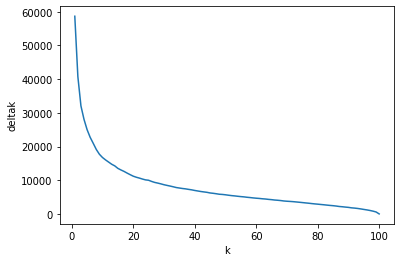

In [79]:
AB = np.dot(A,B)
deltas = []
for k in np.arange(1,m+1):
    Ck = (m/k)*approximate_product(A, B, k)
    deltak = np.linalg.norm(Ck- AB, ord='fro')
    deltas.append(deltak)
    
plt.plot(np.arange(1,m+1), deltas)
plt.xlabel('k')
plt.ylabel('deltak')
plt.show()

## Problem 2: the power method

In this problem, we investigate a popular and simple matrix iteration algorithm called the power method. In this problem, we will use the matrix

$$
A_{\sigma_1,\sigma_2} = \begin{pmatrix}1/\sqrt{2} & -1/\sqrt{2}\\ 1/\sqrt{2} & 1/\sqrt{2}\end{pmatrix}\begin{pmatrix}\sigma_1 & 0 \\ 0 & \sigma_2 \end{pmatrix}\begin{pmatrix}1/\sqrt{2} & 1/\sqrt{2}\\ -1/\sqrt{2} & 1/\sqrt{2}\end{pmatrix}
$$ 

for values of $\sigma_1$ and $\sigma_2$ which will be specified later.


### Part A: unnormalized iterations
Consider the following iterations for some fixed $b_0 \in \mathbb{R}^2$, for $k=0,\dots,N$:

$$
b_{k+1} = A_{\sigma_1,\sigma_2}b_k \hspace{10mm} (*)
$$

and define the quantity

$$
\mu_k = b_{k}^\top b_{k+1} =  b_k^\top A_{\sigma_1,\sigma_2} b_k
$$

Perform the iterations given by $(*)$ for $N=20$ steps using the matrix $A_{\sigma_1,\sigma_2}$ defined above and a randomly drawn starting vector $b_0 \in \mathbb{R}^2$, and at each iteration $k$ compute and store $\mu_k$. Then, plot $\mu_k$ as a function of $k$. Do this for each of the following choices of $\sigma_1,\sigma_2$:

$$
(\sigma_1,\sigma_2) = (.5, .25),\;\;\; (\sigma_1,\sigma_2) = (1.5, .25),\;\;\; (\sigma_1,\sigma_2) = (1, .25)
$$

For each pair of $\sigma_1,\sigma_2$, do the $\mu_k$ converge to a finite value?

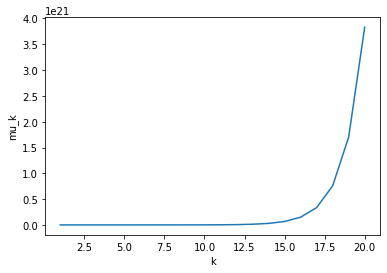

In [75]:
mus = []
for k in range(20):
    b0 = np.dot(A,b0)
    muk = np.dot(b0, np.dot(A, b0))
    mus.append(muk)
    
plt.plot(range(1,21), mus)
plt.xlabel('k')
plt.ylabel('mu_k')
plt.show()

### Part B: normalized iterations

Now consider the following iterations, again for some fixed $b_0 \in \mathbb{R}^2$, for $k=0,\dots,N$:

$$
b_{k+1} = \frac{A_{\sigma_1, \sigma_2}b_k}{\|Ab_k\|_2} \hspace{10mm} (**)
$$

and again define the quantity

$$
\mu_k = b_k^\top A_{\sigma_1,\sigma_2} b_k
$$

Perform the iterations given by $(**)$ for $N=20$ steps using the matrix $A_{\sigma_1,\sigma_2}$ defined above and a randomly drawn starting vector $b_0 \in \mathbb{R}^2$, and at each iteration $k$ compute and store $\mu_k$. Then, plot $\mu_k$ as a function of $k$. Do this for each of the following choices of $\sigma_1,\sigma_2$:

$$
(\sigma_1,\sigma_2) = (.5, .25),\;\;\; (\sigma_1,\sigma_2) = (1.5, .25),\;\;\; (\sigma_1,\sigma_2) = (1, .25)
$$

For each pair of $\sigma_1,\sigma_2$, do the $\mu_k$ converge to a finite value? If so, what is the value that they converge to?

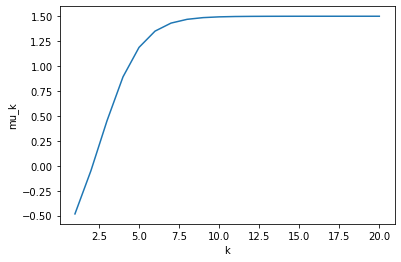

In [47]:
b0 = np.random.randn(2)
mus = []
for k in range(20):
    mus.append(np.dot(b0, np.dot(A, b0)))
    b0 = np.dot(A,b0)
    b0 = b0/np.linalg.norm(b0)
    
plt.plot(range(1,21), mus)
plt.xlabel('k')
plt.ylabel('mu_k')
plt.show()

### Part C
For the remainder of this problem, fix $(\sigma_1,\sigma_2) = (1, .25)$. Repeat the steps of Part C for three different randomly chosen starting vectors $b_0 \in \mathbb{R}^2$. Does the value $\mu_k$ converges to depend on the starting vector?

### Part D
Again fixing $(\sigma_1,\sigma_2) = (1, .25)$, compute and store the vector $b_N$ that is obtained at the end of the $N$ iterations in Part B. Then, find the matrix $A_{\sigma_1,\sigma_2}^{N} = A_{\sigma_1,\sigma_2}A_{\sigma_1,\sigma_2}\cdots A_{\sigma_1,\sigma_2}$ (i.e. multiplying the matrix $A_{\sigma_1,\sigma_2}$ with itself $N$ times -- you can you the function `np.linalg.matrix_power(A,N)` for this). Compare the matrix $A_{\sigma_1,\sigma_2}^{N}$ with the matrix $b_Nb_N^\top$. How do they compare?

## Problem 3: finding angles between vectors

In chapter six, we saw that we can find the angle $\theta$ between two vectors $x$ and $y$ using the following identity:

$$
x^\top y = \|x\|_2\|y\|_2 \cos(\theta) \iff \theta = \cos^{-1}\left(\frac{x^\top y}{\|x\|_2\|y\|_2}\right)
$$

Note that in Python, we can find the arccosine using the function `np.arccos()`.

### Part A
Let $x = (1/\sqrt{2}, 1/\sqrt{2})$, $y = (2, 2)$, and $e_1 = (1,0)$. Plot each of these vectors, and find the angle between each of the following pairs of vectors: $x$ and $y$, $x$ and $e_1$ and $y$ and $e_1$.

### Part B
Let $x = (1/\sqrt{2}, -1/\sqrt{2})$, $y = (0,-1)$, and $e_1 = (1,0)$. Plot each of these vectors, and find the angle between each of the following pairs of vectors: $x$ and $y$, $x$ and $e_1$ and $y$ and $e_1$.

### Part C
For $n = 20$, define the vector $x \in \mathbb{R}^n$ whose $i$th entry is $x_i = \sin(i)$, the vector $y\in \mathbb{R}^n$ whose $i$th entry is $y_i = \cos(i)$, and the vector $z_\alpha = \alpha x + (1-\alpha)y$, for some fixed value $\alpha \in [0,1]$. Let $\theta_\alpha$ be the angle between $x$ and $z_\alpha$. For a range of $\alpha$ between 0 and 1, find $\theta_\alpha$, and plot $\theta_\alpha$ against $\alpha$.